# Dynamics of an echo-state network

In [1]:
%matplotlib inline
from pylab import *

from ESN.esn import ESN

We initialize a reservoir and run it for a period of time. The input of the network is an inpulse followed by exponential decay.

In [2]:
STIME = 10000    # number of timesteps
N = 100    # number of network units

#Init the reservoir
res = ESN( 
    stime        = STIME,
    N            = N,
    dt           = 0.001,
    tau          = 0.6,
    alpha        = 0.2,   # infinitesimal translation
    beta         = 0.8,   # infinitesimal rotation
    epsilon      = 0.5e-12 # lower bound of the spectral radius is 1-epsilon
)      

# Prepare an exponetial decay input function
inp =  exp(-linspace(0, 100, STIME))
    
# Sparse-random projections to the internal units
inp_to_esn_w = rand(N) * (rand(N) <.1)

# integrate
for t in xrange(STIME) :
    res.step(inp_to_esn_w*inp[t])
    res.store(t)    
# Time-series of network activations
X = res.data[res.out_lab].T
# Matrix of inner-weights
M = res.w

## Network dynamics

Each line is the activity of a unit in time:

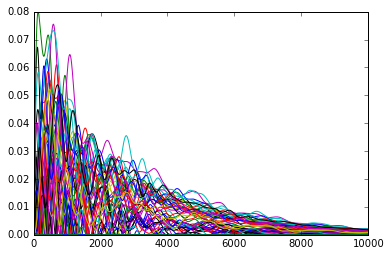

In [3]:
p = plot(X, linewidth=1) 

The exponential decaying input. Each line is the input to a unit

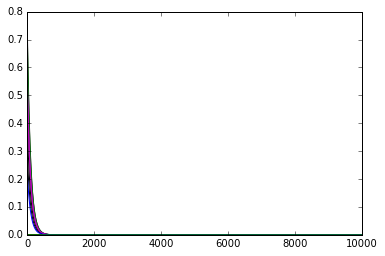

In [4]:
p = plot((outer(inp_to_esn_w,ones(STIME))*inp).T)

The spectrogram of the inner weights matrix depends on **alpha** and **beta**.
**alpha** influences the width of the cloud of eigenvalues, while **beta** influences its height.

(-24.532338521880035, 24.532338521880035)

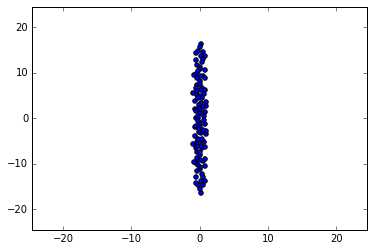

In [5]:
# eigenvalues of M
EM,_ = eig( M )     

# sptectral radius
radius = max(abs(EM))

# Each eigenvalue is a point in the complex plane
scatter(real(EM), imag(EM))
xlim([-(radius*6./4.), (radius*6./4.)])
ylim([-(radius*6./4.), (radius*6./4.)])